# The General Linear F test

The "general linear F-test" involves three basic steps, namely:

1-  Define a larger full model. (By "larger," we mean one with more parameters.)

2-  Define a smaller reduced model. (By "smaller," we mean one with fewer parameters.)

3-  Use an F-statistic to decide whether or not to reject the smaller reduced model in favor of the larger full model.

The GL F test helps to determine whether it is feasable to drop certain dependent variables that are not statistically significant. This method could be useful when trying to build a simpler model

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression




This dataset consists of variables possibly relating to blood pressures of n = 39 Peruvians who have moved from rural high altitude areas to urban lower altitude areas

In [2]:
data = pd.read_csv('peru.csv',delimiter='\t') # load data

In [3]:
data.head() # overview

,Age,Years,Weight,Height,Chin,Forearm,Calf,Pulse,Systol,Diastol
0,21,1,71.0,1629,8.0,7.0,12.7,88,170,76
1,22,6,56.5,1569,3.3,5.0,8.0,64,120,60
2,24,5,56.0,1561,3.3,1.3,4.3,68,125,75
3,24,1,61.0,1619,3.7,3.0,4.3,52,148,120
4,25,1,65.0,1566,9.0,12.7,20.7,72,140,78


In [4]:
data['FracLife'] = data['Years']/data['Age'] # create a new variable
data.describe() # describe the dataset

,Age,Years,Weight,Height,Chin,Forearm,Calf,Pulse,Systol,Diastol,FracLife
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,36.538462,14.743590,63.158974,1578.923077,5.848718,5.066667,8.251282,70.307692,127.410256,76.179487,0.386334
std,7.687468,10.093557,7.098878,52.694944,2.722312,2.294425,4.061752,9.498348,13.110297,11.688663,0.229837
min,21.000000,1.000000,53.000000,1473.000000,3.000000,1.300000,0.000000,52.000000,106.000000,54.000000,0.021277
25%,32.500000,8.000000,57.000000,1537.000000,3.300000,3.300000,5.700000,64.000000,118.000000,70.000000,0.227390
50%,38.000000,13.000000,62.500000,1572.000000,5.300000,5.000000,7.700000,72.000000,126.000000,76.000000,0.393939
75%,41.500000,19.000000,68.000000,1627.000000,7.650000,5.850000,11.300000,76.000000,134.000000,81.000000,0.526374
max,54.000000,43.000000,87.000000,1653.000000,12.000000,12.700000,20.700000,92.000000,170.000000,120.000000,0.892857


In [5]:
c = data.columns.tolist() # create a list of variables 
c.append('') # append empty 

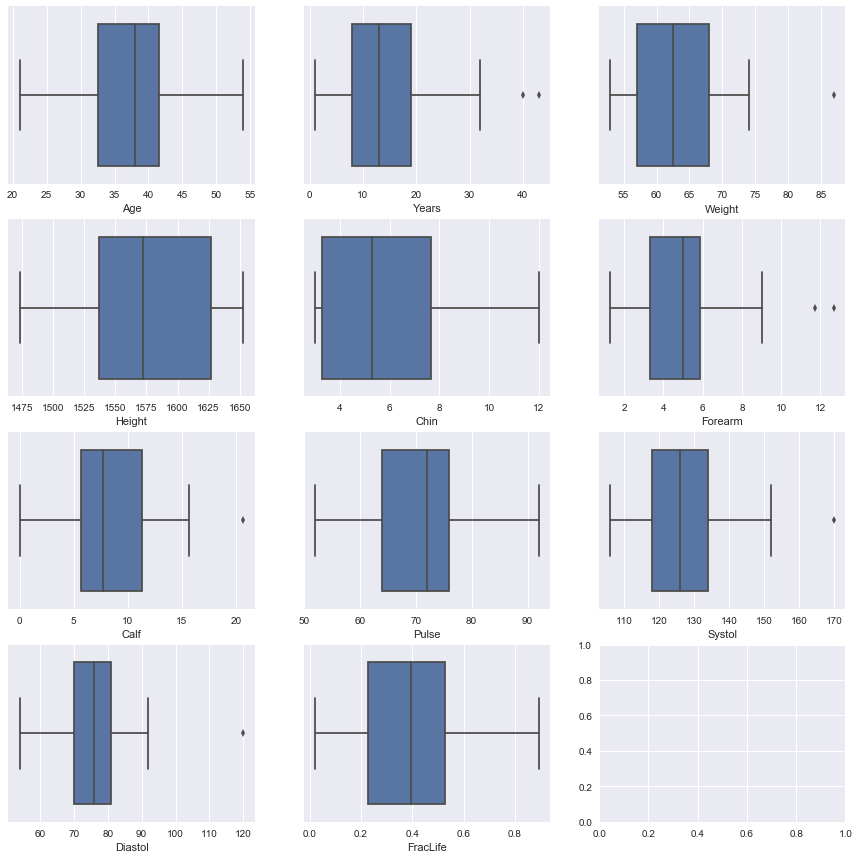

In [6]:
fig, ax = plt.subplots(4,3,figsize=(15,15)) # plot boxgraphs
new_shape = np.array(c).reshape(-1,3)
for ind,row in enumerate(new_shape):
    for j,i in enumerate(row):
        if i=='':
            break
        sns.boxplot(data[i], ax=ax[ind][j])

In [7]:
y= data['Systol'] # target variable
X= data.drop(['Systol','Diastol'], axis=1) # drop the target

In [8]:
X.shape,y.shape 

((39, 9), (39,))

In [9]:
lr = LinearRegression() # initialize linearRegression
lr.fit(X,y) # fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_pred = lr.predict(X) # predict variables

In [11]:
residuals = y-y_pred # residuals

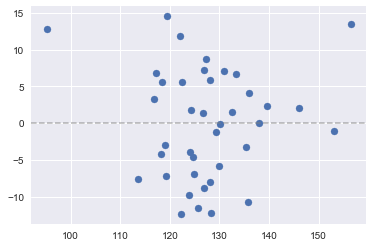

In [12]:
plt.scatter(y_pred,residuals) # check residuals plot
plt.axhline(y=0,ls='dashed',c='grey', alpha=0.5)

In [13]:
# this function return degrees of freedom, sum of squares and mean squared errors. 
# in addition it creates a summary of ['Coefficients','Standard Errors','t values','Probabilites'] in a Dataframe format
def reg_summary(X,y):
    lr = LinearRegression()
    lr.fit(X,y)

    if lr.intercept_ == 0:
        params = np.array(lr.coef_)
    else:
        params = np.append(lr.intercept_,lr.coef_)
    
    predictions = lr.predict(X)

    newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    deg_f = len(newX)-len(newX.columns)
    SSE = sum((y-predictions)**2)
    MSE = (sum((y-predictions)**2))/deg_f


    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)

    df = pd.DataFrame()
    df["Coefficients"],df["Standard Errors"],df["t values"],df["Probabilites"] = [params,sd_b,ts_b,p_values]
    coef = X.columns.tolist()
    if lr.intercept_==0:
        df.index = coef
    else:
        coef.insert(0,'constant')
        df.index = coef
    return deg_f, SSE, MSE, df

In [14]:
from sklearn.metrics import r2_score

In [15]:
df_er_f,SSE_f, MSE_f, df_f = reg_summary(X,y)
df_er_f,SSE_f, MSE_f

(29, 2172.5839795318152, 74.91668894937294)

In [16]:
r2_score(y,y_pred)

0.6673650306535619

In [17]:
df_f

,Coefficients,Standard Errors,t values,Probabilites
constant,146.8191,48.971,2.998,0.005
Age,-1.1214,0.327,-3.425,0.001
Years,2.4554,0.815,3.014,0.005
Weight,1.4139,0.431,3.281,0.002
Height,-0.0346,0.037,-0.940,0.353
Chin,-0.9437,0.741,-1.274,0.211
Forearm,-1.1709,1.193,-0.981,0.333
Calf,-0.1587,0.537,-0.295,0.769
Pulse,0.1146,0.170,0.672,0.506
FracLife,-115.2939,30.169,-3.822,0.000


In [18]:
coef_ns = df_f[df_f['Probabilites']>0.05].index.tolist()

In [19]:
X_r = X.drop(coef_ns, axis=1)

In [20]:
df_er_r,SSE_r, MSE_r, df_r = reg_summary(X_r,y)
df_er_r,SSE_r, MSE_r

(34, 2629.7077596448835, 77.344345871908331)

In [21]:
df_r

,Coefficients,Standard Errors,t values,Probabilites
constant,116.8354,21.980,5.316,0.000
Age,-0.9507,0.316,-3.004,0.005
Years,2.3393,0.771,3.032,0.004
Weight,0.8324,0.275,3.022,0.004
FracLife,-108.0728,28.330,-3.815,0.000


In [22]:
def General_linear_f_test(SSE_r,SSE_f,df_er_r,df_er_f):
    F= ((SSE_r-SSE_f)/(df_er_r-df_er_f))/(SSE_f/df_er_f)
    p = 1.0 - stats.f.cdf(F,df_er_r-df_er_f,df_er_f)
    return F, p 

In [23]:
General_linear_f_test(SSE_r,SSE_f,df_er_r,df_er_f)


(1.2203523314330735, 0.32472949656136973)

In [24]:
r2_score(y,lr.fit(X_r,y).predict(X_r))

0.59737677886768348

The p-value of the general linear F test is not at a statistically significant level, so we do not reject the null hypothesis. Thus it is feasible to drop the variables Height, Chin, Forearm, Calf, and Pulse from the model.